# <font color='blue'>Análise dos dados do Prouni</font>

In [496]:
#Importação das Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Importação das bases do Prouni

In [498]:
# Carga do DataSet de2018
# df_2018 = pd.read_csv('/media/joao/DATA/TCE/Bases/Prouni_2018.csv', sep=',') #Linux

df_2018 = pd.read_csv('Bases/Prouni_2018.csv', sep=';') #Windows 
# df_2018.head() 
# df_2018.shape

df_2017 = pd.read_csv('Bases/Prouni_2017.csv', sep=';') #Windows 
# df_2017.head() 
# df_2017.shape

df_2016 = pd.read_csv('Bases/Prouni_2016.csv', sep=';') #Windows 
# df_2016.head() 
# df_2016.shape

df_2015 = pd.read_csv('Bases/Prouni_2015.csv', sep=';') #Windows 
# df_2015.head() 
# df_2015.shape

df_2014 = pd.read_csv('Bases/Prouni_2014.csv', sep=';') #Windows 
# df_2014.head() 
# df_2014.shape

df_2013 = pd.read_csv('Bases/Prouni_2013.csv', sep=';') #Windows 
# df_2013.head() 
# df_2013.shape

df_2012 = pd.read_csv('Bases/Prouni_2012.csv', sep=';') #Windows 
# df_2012.head() 
# df_2012.shape

df_2011 = pd.read_csv('Bases/Prouni_2011.csv', sep=';') #Windows 
# df_2011.head() 
# df_2011.shape

df_2010 = pd.read_csv('Bases/Prouni_2010.csv', sep=';') #Windows 
# df_2010.head() 
# df_2010.shape

# df_2019 = pd.read_csv('Bases/Prouni_2009.csv', sep=';') #Windows 
# df_2009.head() 
# df_2009.shape

df_municipios = pd.concat([df_2010, df_2011, df_2012, df_2013, 
                           df_2014, df_2015, df_2016, df_2017, df_2018])

(1878099, 15)

## Bolsas de Santos por ano 

In [492]:
df_santos = df_municipios[df_municipios.MUNICIPIO_BENEFICIARIO_BOLSA == "SANTOS"]
df_santos_ano = df_santos.set_index(['MUNICIPIO_BENEFICIARIO_BOLSA','ANO_CONCESSAO_BOLSA'])
df_santos_ano = df_santos_ano.groupby(level = ['MUNICIPIO_BENEFICIARIO_BOLSA', 'ANO_CONCESSAO_BOLSA'])
df_santos_ano = df_santos_ano.size()  #Tamanho de cada Grupo 
df_santos_ano

MUNICIPIO_BENEFICIARIO_BOLSA  ANO_CONCESSAO_BOLSA
SANTOS                        2010                   284
                              2011                   367
                              2012                   377
                              2013                   362
                              2014                   476
                              2015                   596
                              2016                   630
                              2017                   598
                              2018                   455
dtype: int64

## Bolsas de Santos por ano e por curso

In [501]:
#Subset dos dados por Curso e por ano
df_curso_santos = df_santos.set_index(['NOME_CURSO_BOLSA','ANO_CONCESSAO_BOLSA'])
df_curso_santos = df_curso_santos.groupby(level = ['NOME_CURSO_BOLSA', 'ANO_CONCESSAO_BOLSA'])
df_curso_santos = df_curso_santos.size()           #Tamanho de cada Grupo 
df_curso_santos = df_curso_santos.sort_values(ascending = False)
df_curso_santos.head(20) 

NOME_CURSO_BOLSA    ANO_CONCESSAO_BOLSA
Direito             2016                   69
Administração       2016                   61
Direito             2015                   61
Administração       2014                   58
                    2015                   57
                    2011                   56
ADMINISTRAÇÃO       2018                   54
DIREITO             2017                   53
Administração       2012                   51
ADMINISTRAÇÃO       2017                   45
Administração       2013                   45
DIREITO             2018                   44
Direito             2014                   41
Administração       2010                   39
Comércio Exterior   2015                   36
                    2014                   35
                    2012                   33
Engenharia Civil    2015                   31
                    2014                   31
Ciências Contábeis  2016                   30
dtype: int64

## Tratamento dos dados 

In [502]:
# Tratamento dos dados para correção de letras Maíusculas e Minúsculas 

df_curso_santos = pd.DataFrame(df_curso_santos) # Conversão para DataFrame para usar os métodos dos Pandas
df_curso_santos = df_curso_santos.reset_index()

In [507]:
df_curso_santos = df_curso_santos.rename(columns = {'NOME_CURSO_BOLSA':'NOME_CURSO_BOLSA', 
                                  'ANO_CONCESSAO_BOLSA':'ANO',
                                   0:'QUANTIDADE_BOLSAS'})
df_curso_santos.head(15)

,CURSO,ANO,QUANTIDADE_BOLSAS
0,DIREITO,2016,69
2,DIREITO,2015,61
1,ADMINISTRAÇÃO,2016,61
3,ADMINISTRAÇÃO,2014,58
4,ADMINISTRAÇÃO,2015,57
5,ADMINISTRAÇÃO,2011,56
6,ADMINISTRAÇÃO,2018,54
7,DIREITO,2017,53
8,ADMINISTRAÇÃO,2012,51
9,ADMINISTRAÇÃO,2017,45


In [508]:
# Converte o nome do curso para letras Maíusculas 
df_curso_santos['CURSO'] = [x.upper() for x in df_curso_santos['NOME_CURSO_BOLSA']]
df_curso_santos.head(15)

KeyError: 'NOME_CURSO_BOLSA'

In [510]:
# Criação do Subset tratado com dos dados de cursos por ano e no munícipio de Santos

df_cursos = df_curso_santos[['CURSO','ANO','QUANTIDADE_BOLSAS']]   
df_curso_santos = df_cursos.sort_values('QUANTIDADE_BOLSAS', ascending = False)
df_curso_santos.head(20)

,CURSO,ANO,QUANTIDADE_BOLSAS
0,DIREITO,2016,69
2,DIREITO,2015,61
1,ADMINISTRAÇÃO,2016,61
3,ADMINISTRAÇÃO,2014,58
4,ADMINISTRAÇÃO,2015,57
5,ADMINISTRAÇÃO,2011,56
6,ADMINISTRAÇÃO,2018,54
7,DIREITO,2017,53
8,ADMINISTRAÇÃO,2012,51
9,ADMINISTRAÇÃO,2017,45


In [512]:
# Identifica qual é o curso com mais bolsas no municipio de Santos 

df_direito = df_cursos[df_cursos.CURSO == 'DIREITO'] 
df_agg_direito = df_direito.groupby('CURSO').sum()

df_adm = df_cursos[df_cursos.CURSO == 'ADMINISTRAÇÃO']
df_agg_adm = df_adm.groupby('CURSO').sum()


In [516]:
# Concatena os subsets de Direito e Adminstração 
df_bolsas = pd.concat([df_agg_direito[['QUANTIDADE_BOLSAS']],df_agg_adm[['QUANTIDADE_BOLSAS']]])

In [522]:
#Apresenta a base concatenada
df_bolsas.sort_values('QUANTIDADE_BOLSAS', ascending = False)

,QUANTIDADE_BOLSAS
CURSO,
ADMINISTRAÇÃO,466
DIREITO,366


### Relação entre o número de bolsas concedidas e bolsas para a um curso específico

### Implementação de Modelo de Machine Learning : Regressão Linear

### <font color='blue'>Dos conjunto de técnicas de regressão, a regressão linear é a mais simples em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma variávvel, sem que haja, entretanto uma obrigatória relação de causa e efeito.</font>

### 1º Passo verificar a relação entre as variáveis por meio do Gráfico de Dispersão

### Curso de Administração 

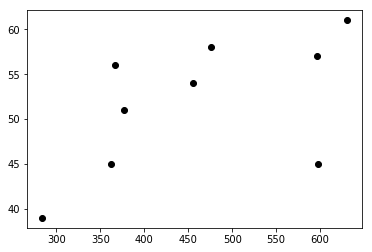

In [591]:
# Scatter Plot representando a dispersão dos dados 
x = df_santos_ano.values                  # Eixo x do gráfico: Número de bolsas por ano no município de Santos 

df_adm  = df_adm .sort_values('ANO')      # Eixo y do gráfico: Número de bolsa por ano para o curso de Administração
y = df_adm ['QUANTIDADE_BOLSAS']

plt.scatter(x, y,  color = 'black')

### Curso de Direito

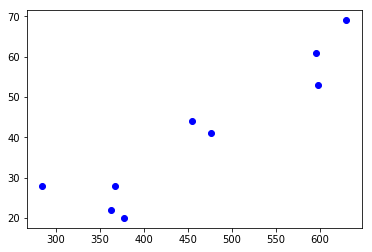

In [600]:
# Scatter Plot representando a dispersão dos dados 
x = df_santos_ano.values                           # Eixo x do gráfico: Número de bolsas por ano no município de Santos 

df_direito  = df_direito.sort_values('ANO')        # Eixo y do gráfico: Número de bolsa por ano para o curso de Direito
y = df_direito['QUANTIDADE_BOLSAS']

plt.scatter(x, y,  color = 'blue')

### 2º Passo Traçar a Reta de Projeção

## Pacote StatsModel 

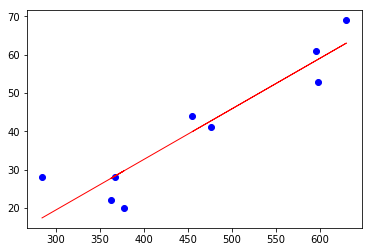

In [605]:
# Implementação como StatsModel 

# Traço da Reta de projeção para o curso de Admnistração 
plt.scatter(x, y,  color = 'blue')

# Identificação da variável independente: Número de bolsas 
X_sm = sm.add_constant(x)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# Variável dependente: Número de bolsas do curso
results = sm.OLS(y, X_sm).fit()
plt.plot(x, results.predict(X_sm), color = 'red', linewidth = 1)

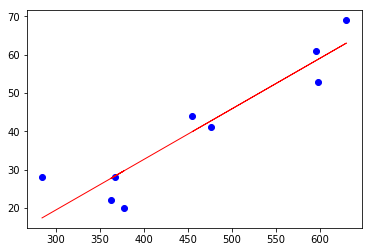

In [601]:

# Traço da Reta de projeção para o curso de Admnistração 
plt.scatter(x, y,  color = 'blue')

# Identificação da variável independente: Número de bolsas 
X_sm = sm.add_constant(x)

# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
# Variável dependente: Número de bolsas do curso
results = sm.OLS(y, X_sm).fit()
plt.plot(x, results.predict(X_sm), color = 'red', linewidth = 1)

In [595]:
### Dados estatísticos do Modelo de Dados 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      QUANTIDADE_BOLSAS   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     3.082
Date:                Thu, 07 Mar 2019   Prob (F-statistic):              0.123
Time:                        11:34:50   Log-Likelihood:                -28.524
No. Observations:                   9   AIC:                             61.05
Df Residuals:                       7   BIC:                             61.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7200      8.849      4.150      0.004      15.795      57.645
x1             0.0327      0.019      1.756      0.123      -0.011       0.077
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   2.656
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.883
Skew:                          -0.685   Prob(JB):                        0.643
Kurtosis:                       2.309   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [596]:

# mostrando as previsões para o mesmo conjunto passado
# results.predict(X_sm)

In [480]:
print("Número de bolsas de direito %.0f" % results.predict([1, 598]))

Número de bolsas de direito 59


In [369]:
# Criando o modelo
modelo = LinearRegression()

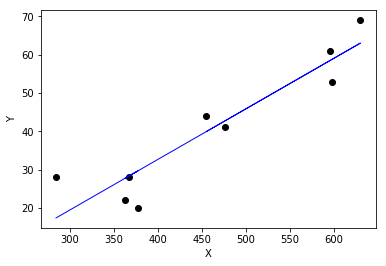

In [452]:
# Treinando o modelo
%matplotlib inline
x = [[284], [367], [377], [362], [476], [596], [630], [598], [455]] # Números totais de bolsas por ano
y = [[28], [28], [20], [22], [41], [61], [69], [53], [44]]          # Numeros de bolsa por ano do curso de direito

modelo.fit(x,y)

# modelo.predict(x)
plt.scatter(x, y,  color = 'black')
plt.plot(x, modelo.predict(x), color = 'blue', linewidth = 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [477]:
# Prevendo número de bolsa de direito em relação ao número de bolsas do Prouni
print("Número de bolsas de direito %.0f" % modelo.predict([[300]]))

Número de bolsas de direito 19


In [463]:
# Coeficientes
print('Coeficiente: \n', modelo.coef_)

# MSE (mean square error)
print("MSE: %.2f" % np.mean((modelo.predict(x) - y) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % modelo.score(x, y))

Coeficiente: 
 [[0.13208373]]
MSE: 37.00
Score de variação: 0.87
